In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# store map size (pixels)
STORE_SIZE = [3136, 2475] 

TRANSFORMED_DATA_PATH = "C:/Users/diogo/Desktop/Tese/Resultados/transformed_coords.csv"
MAP_PATH = "C:/Users/diogo/Desktop/Tese/Dados/floorplan.png"



In [63]:
df = pd.read_csv(TRANSFORMED_DATA_PATH)

,Unnamed: 0.1,Unnamed: 0,xmin,ymin,xmax,ymax,confidence,class,name,xmin_track,...,ymax_real,frame_idx,Customer_id,time,x_frame,y_frame,x_floorplan,y_floorplan,camera,real_time
0,0,0,173.322418,298.714783,258.738098,476.472382,0.490883,0.0,person,173.0,...,476.472382,1681,31.0,09:30:13,216.0,476.0,1106.655414,1445.109068,1.03,18:49:46
1,1,0,172.177002,296.251678,264.606384,472.565857,0.495701,0.0,person,175.0,...,472.565857,1685,31.0,09:30:13,218.0,472.0,1107.430961,1446.409055,1.03,18:49:46
2,2,0,168.392349,296.885681,283.628845,471.694275,0.495246,0.0,person,181.0,...,471.694275,1689,31.0,09:30:14,226.0,471.0,1109.115317,1445.465900,1.03,18:49:47
3,3,0,171.054672,301.844727,288.229431,473.483582,0.668843,0.0,person,186.0,...,473.483582,1694,31.0,09:30:15,229.0,473.0,1109.511951,1444.142931,1.03,18:49:48
4,4,0,175.154572,295.096436,289.564270,471.141724,0.694716,0.0,person,188.0,...,471.141724,1698,31.0,09:30:16,232.0,471.0,1110.303644,1444.451963,1.03,18:49:49


In [60]:
def get_data_by_customer(df, customer_id):
    return df.loc[df["Customer_id"] == customer_id]

def get_data_by_customer_and_camera(df, customer_id, camera):
    return df.loc[df["Customer_id"] == customer_id].loc[df["camera"] == camera]

def get_data_by_time(df, begin_time, end_time):
    return df.loc[(df["real_time"] > begin_time) & (df["real_time"] < end_time)]

def count_different_customers(df):
    return df.Customer_id.unique().size

def get_time_interval(df):
    min_time = df["real_time"].min()
    max_time = df["real_time"].max()
    return (min_time, max_time)

def print_trajectory_chronologically(df):
    img = plt.imread(MAP_PATH)
    fig, ax = plt.subplots()
    fig.set_dpi(1200)
    ax.imshow(img, extent=[0, STORE_SIZE[0], 0, STORE_SIZE[1]])

    df_chrono = df.sort_values(by=["real_time"])
    df_list = df_chrono.values.tolist()
    color_palette = sns.color_palette("inferno", len(df_list))
    for i in range(len(df_list)):
        plt.scatter(df_list[i][22], df_list[i][23], marker=".", s=1, lw=0, color=color_palette[i])
        
    plt.show()

### Projeção 1

Está a ser visualizado apenas o cliente identificado com o número 1848.0 e apenas dados da camara 1.03

Mais escuro -> mais antigo<br>
Mais claro  -> mais recente

1
('21:39:05', '21:43:56')


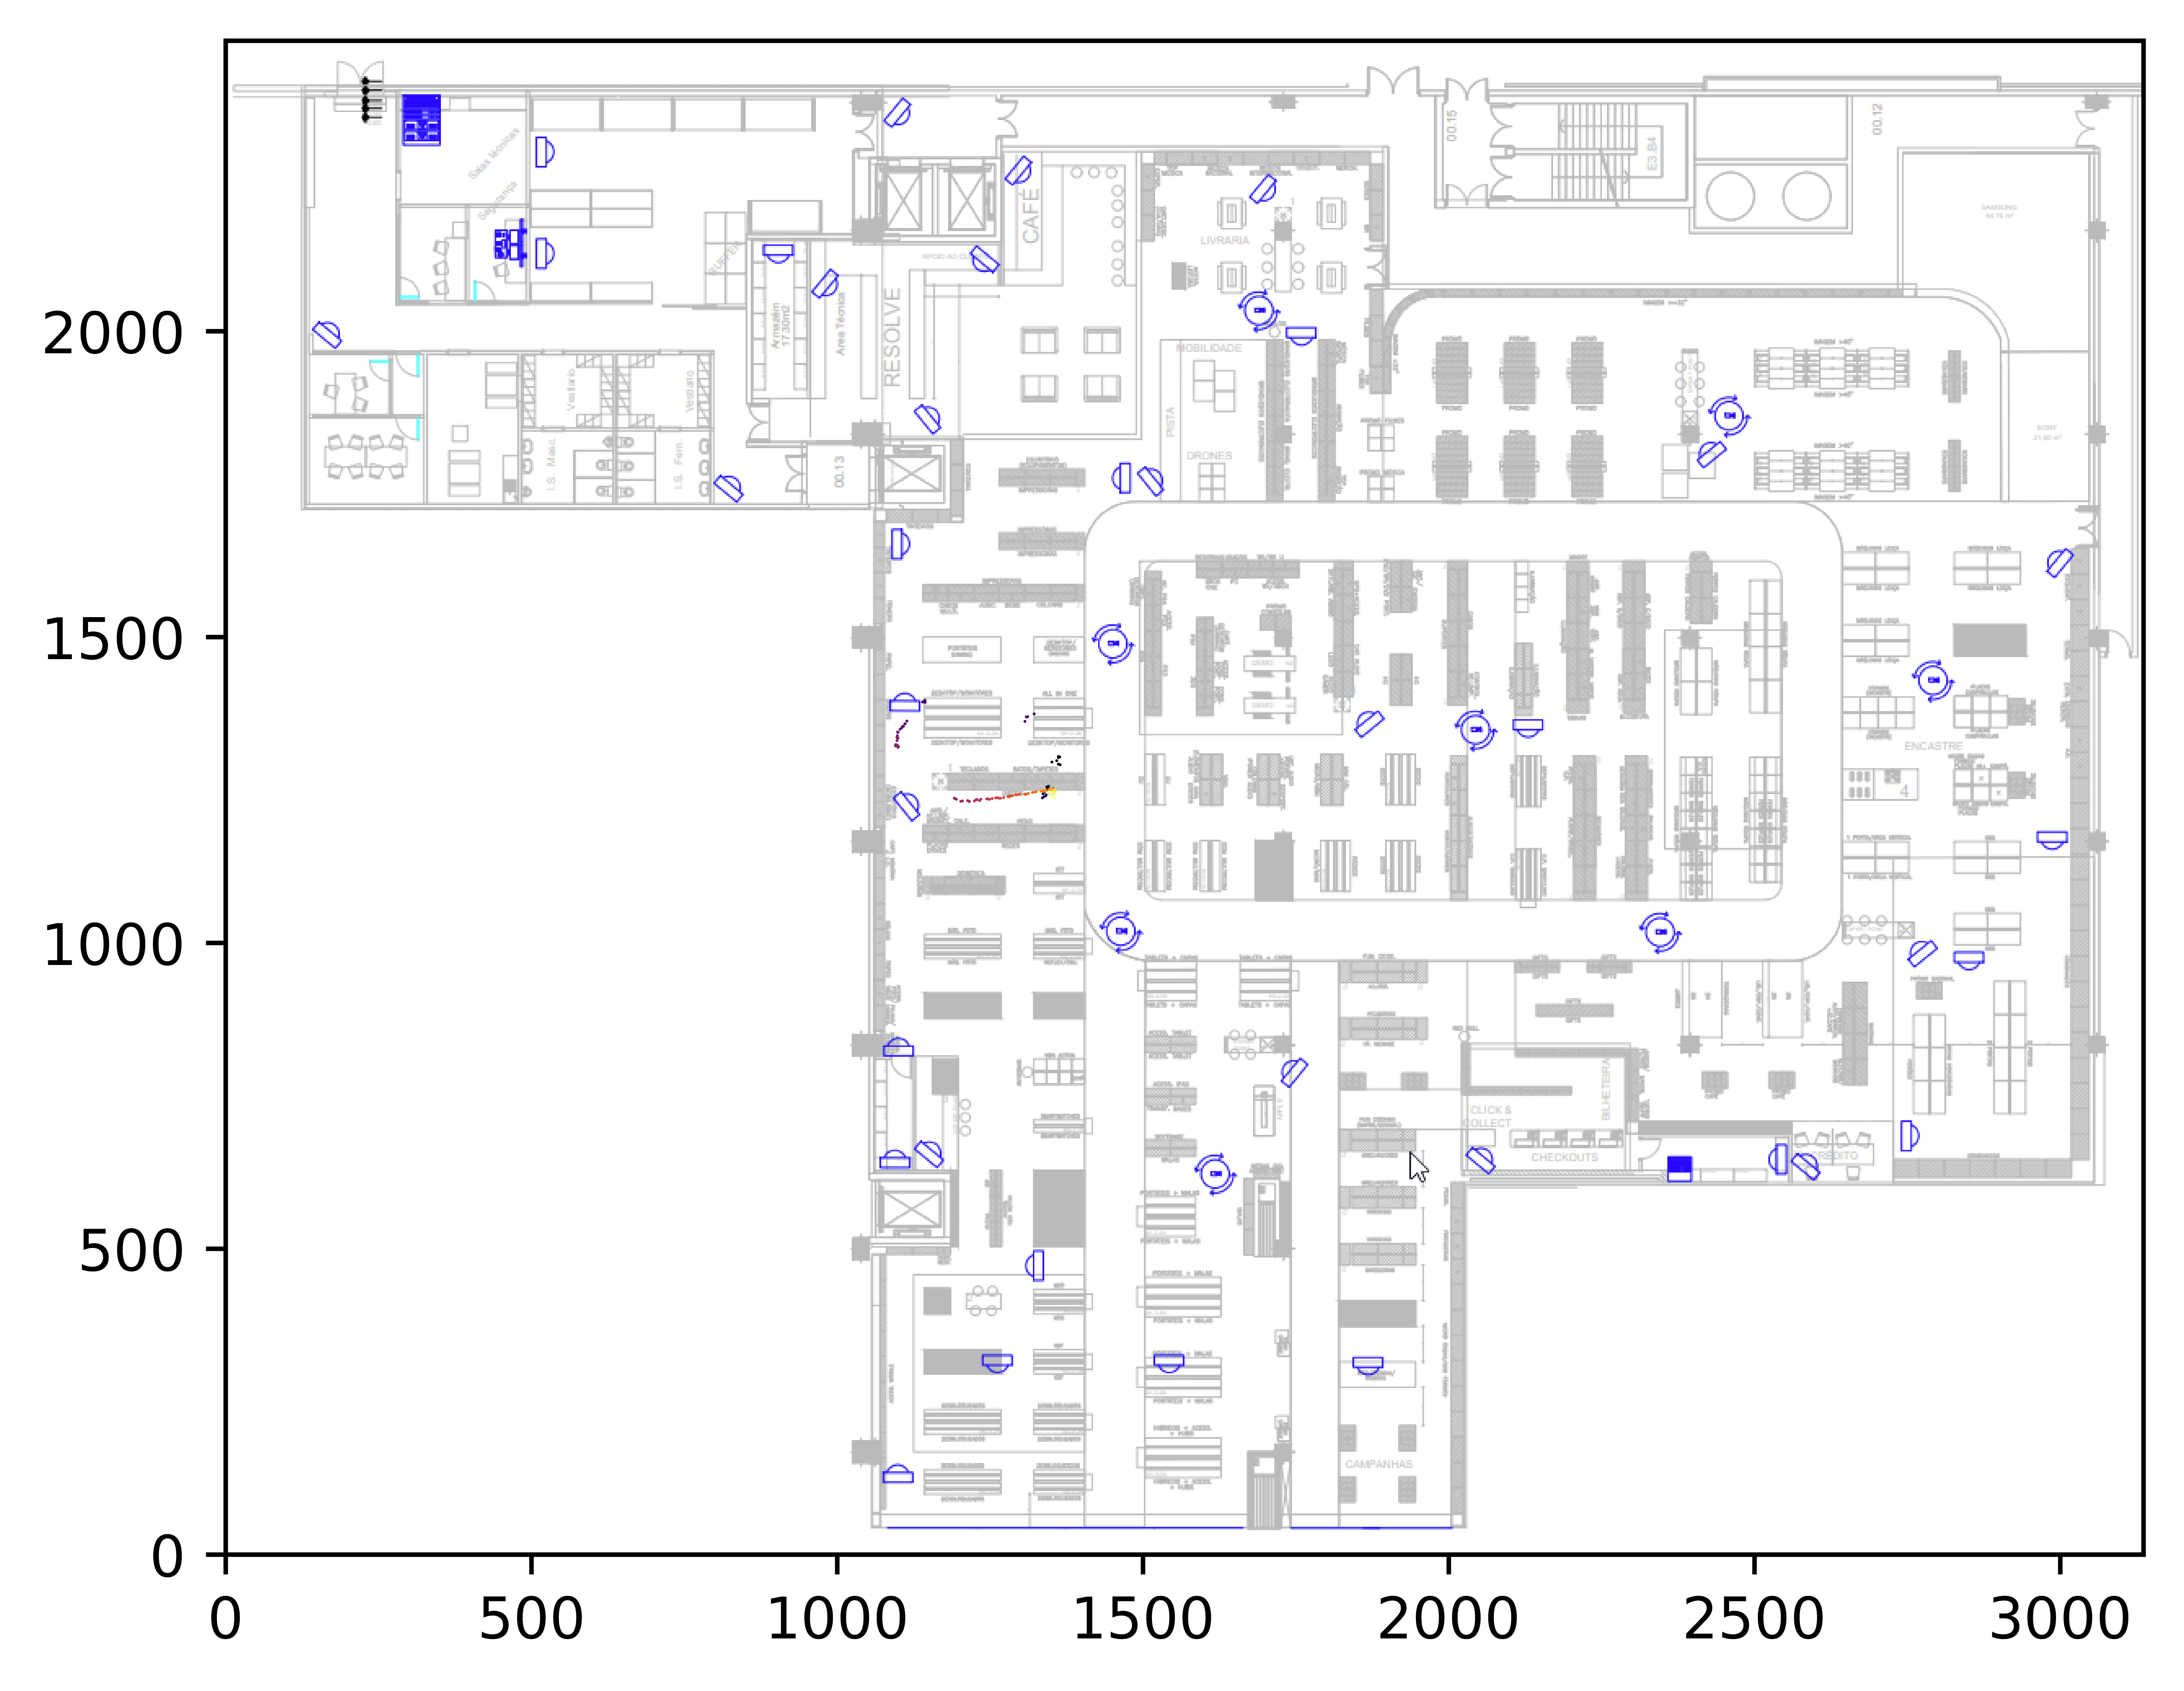

In [69]:
data_by_client = get_data_by_customer_and_camera(df, 1848.0, 1.03)
print(count_different_customers(data_by_client))
print(get_time_interval(data_by_client))
print_trajectory_chronologically(data_by_client)

### Projeção 2

Estão a ser visualizados todos os clientes no espaço de tempo definido

Mais escuro -> mais antigo<br>
Mais claro  -> mais recente

98


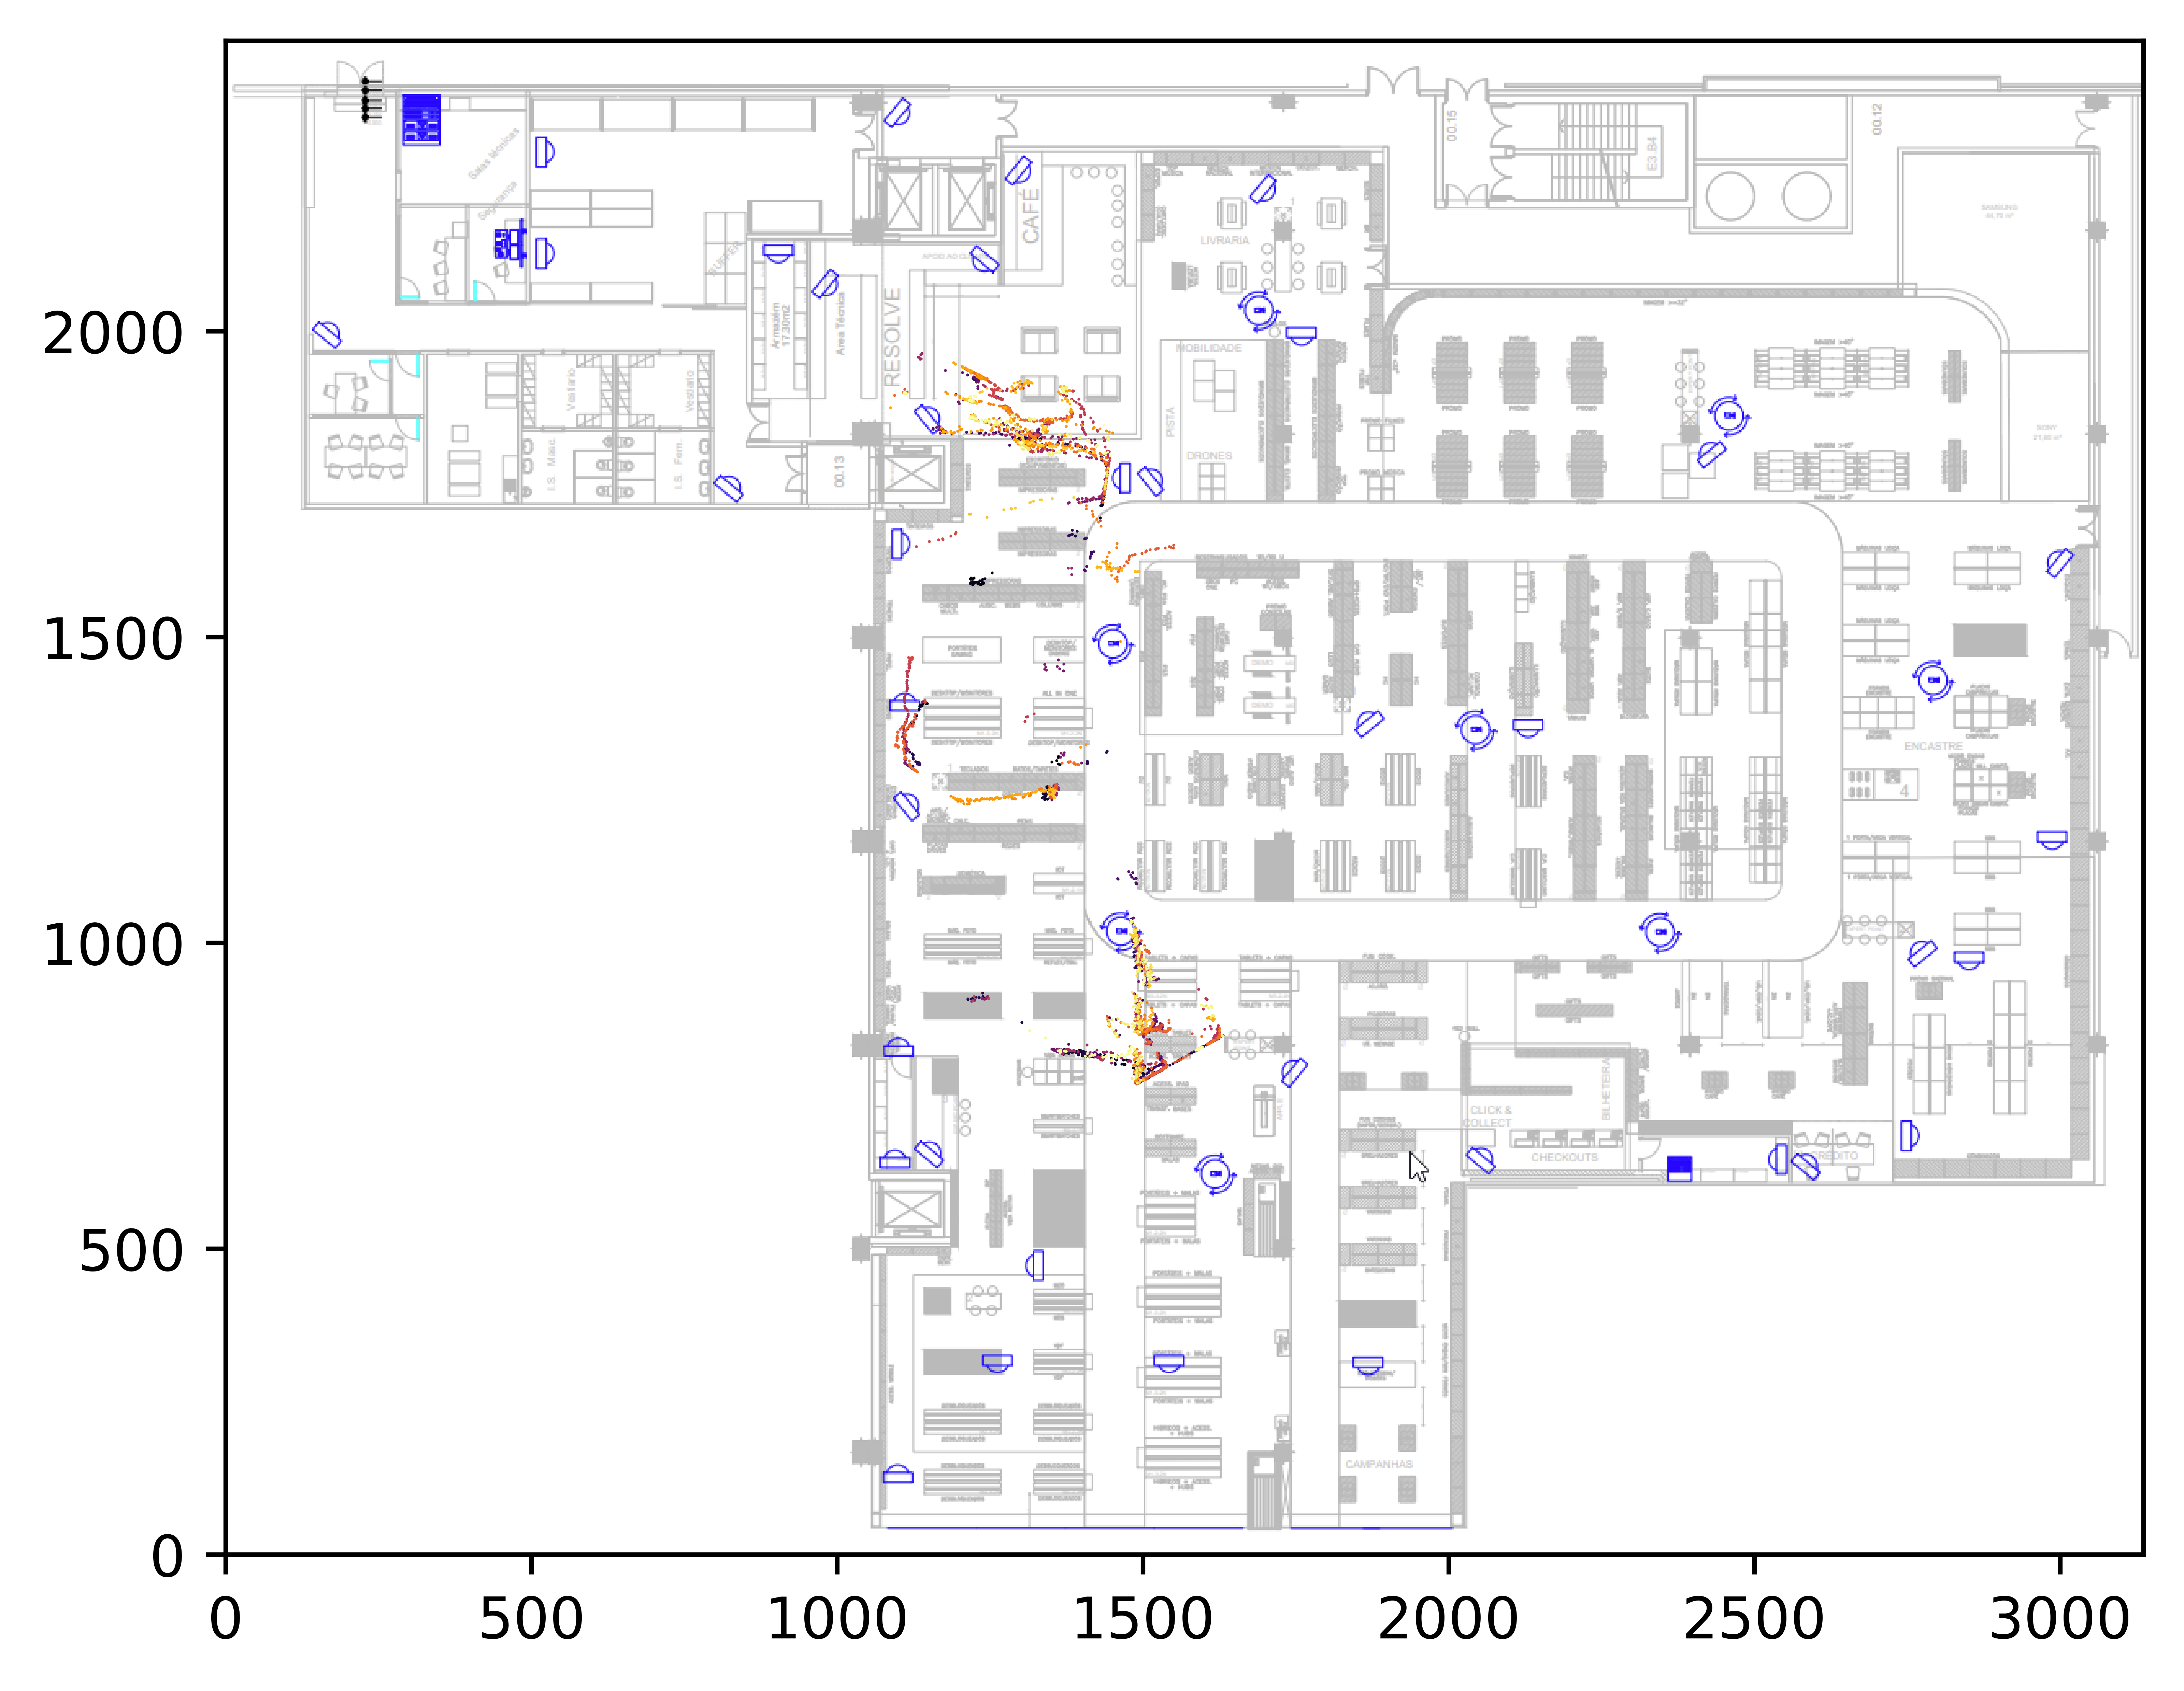

In [70]:
data_by_time = get_data_by_time(df, "21:39:00", "21:45:00")
print(count_different_customers(data_by_time))
print_trajectory_chronologically(data_by_time)